### Import basic modules

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

### Import dataset

In [12]:
df = pd.read_csv('data/Dataset.csv')

/tmp/ipykernel_271571/84244152.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Dataset.csv')


### I/ Data cleansing (and export)
 
Using our speculations, deductions and conclusions in documentation/cleansing.md report, we would like to introduce some cleansing methods for this datasets as shown below. 

In [ ]:
import modules.cleansing as cl

df = cl.remove_columns(df, ['PATIENT_TYPE'])
df = cl.remove_invalid_values(df)
df = cl.mapping_bool_values(df=df, excluded_columns=['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED', 'AGE', 'CLASIFFICATION_FINAL'])
df = cl.remove_outliers(df, 'AGE')

In [14]:
df.to_csv('data/Dataset_revised.csv', index=False)

### II/ Descriptive Statistics and Data Visualisation: 
 


In [15]:
new_column_list = []
for column in df.columns:
    if column not in ['index', 'USMER', 'MEDICAL_UNIT', 'DATE_DIED']:
        new_column_list.append(column)

analytics_df = df[new_column_list].copy()
analytics_df

,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2.0,1.0,0.0,55,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
1,1.0,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
2,1.0,0.0,0.0,37,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3,0.0
3,1.0,0.0,0.0,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
4,2.0,0.0,0.0,24,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200026,1.0,0.0,1.0,61,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7,0.0
200027,1.0,0.0,1.0,63,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0
200028,1.0,0.0,0.0,23,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7,0.0
200029,1.0,0.0,0.0,56,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0


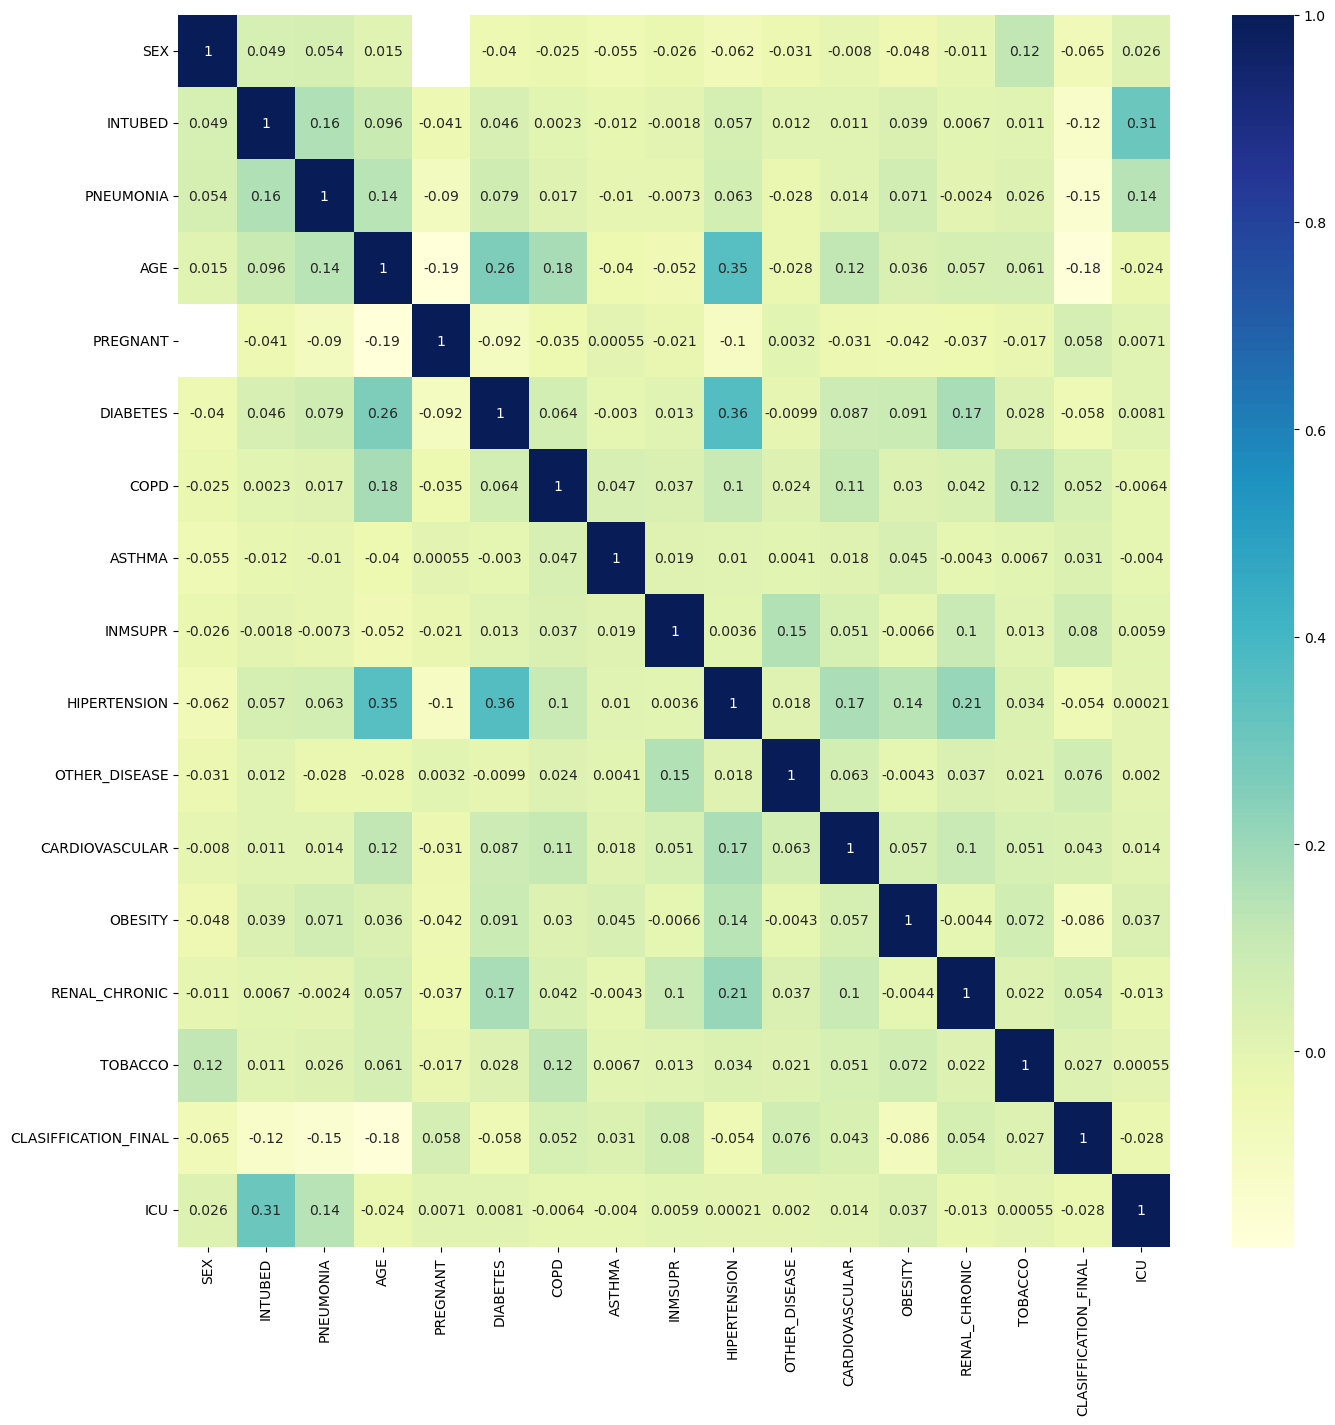

In [16]:
plt.figure(figsize=(16, 16))
co_mtx = analytics_df.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

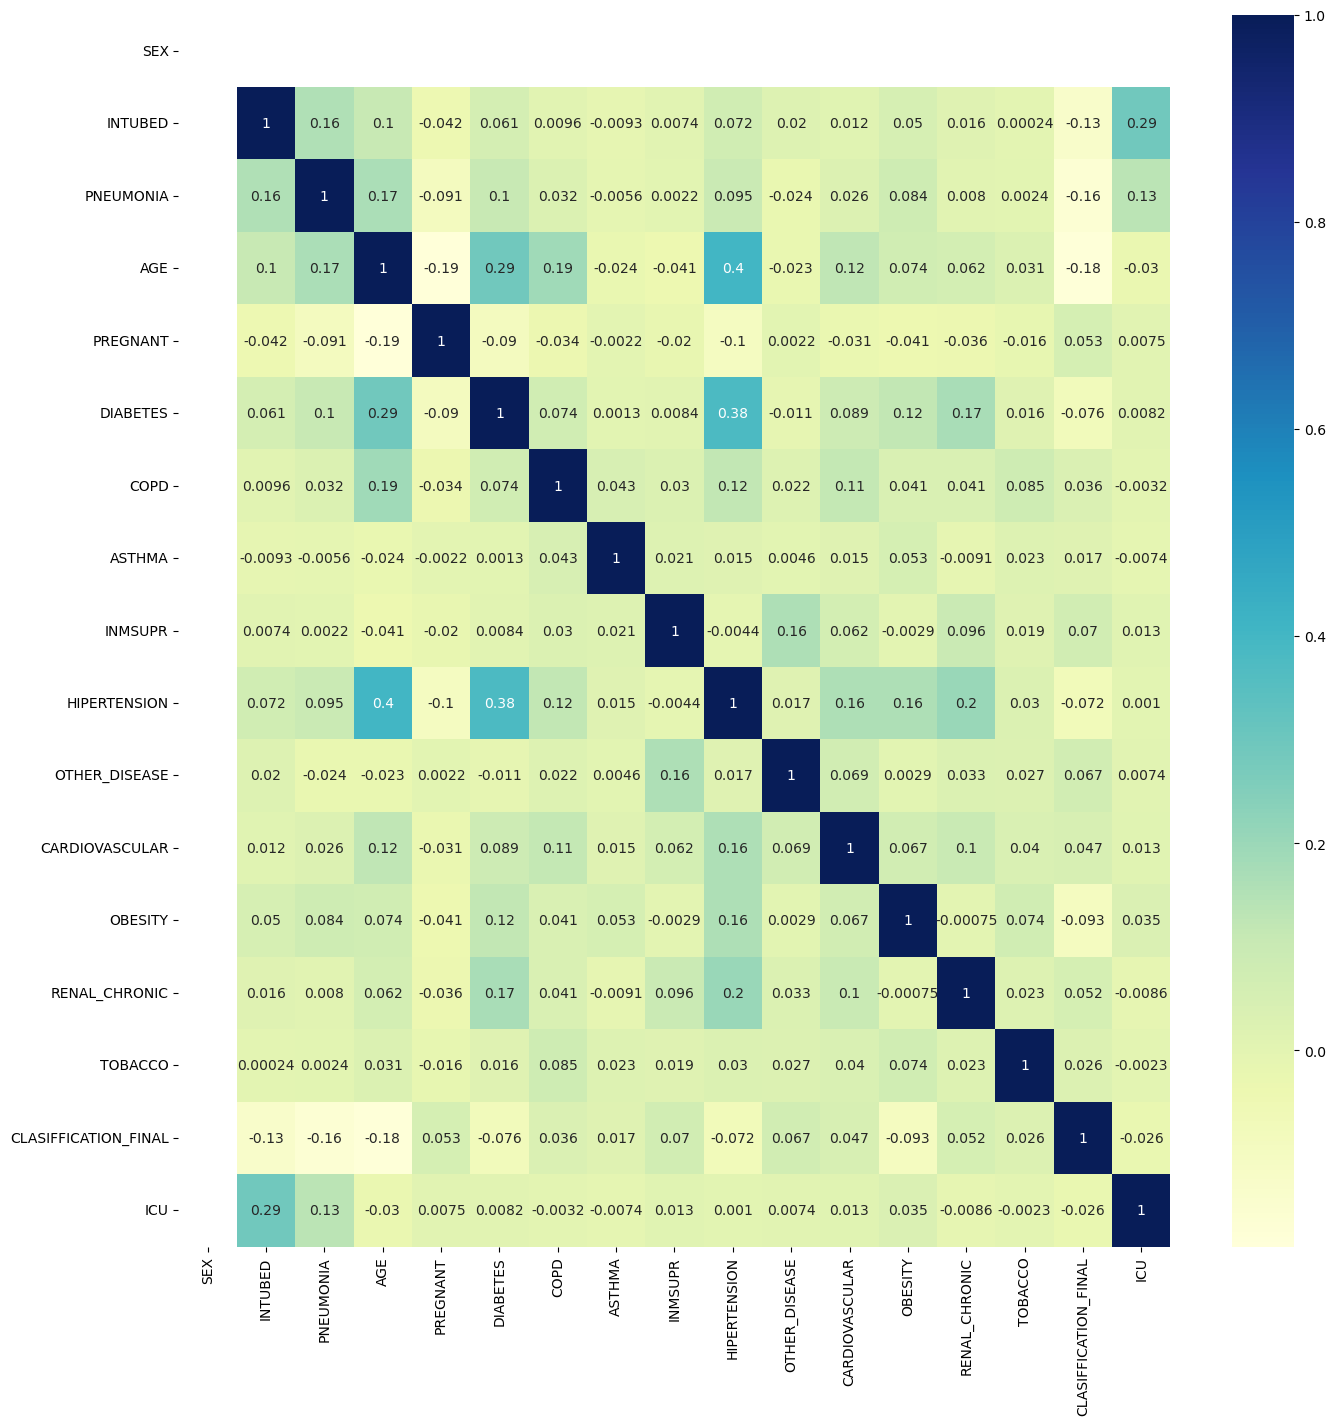

In [17]:
analytics_df2 = analytics_df.copy()
analytics_df2 = analytics_df2.dropna(axis=0, how='any')

plt.figure(figsize=(16, 16))
co_mtx2 = analytics_df2.corr(method ='pearson')

# Plot correlation heatmap
sns.heatmap(co_mtx2, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

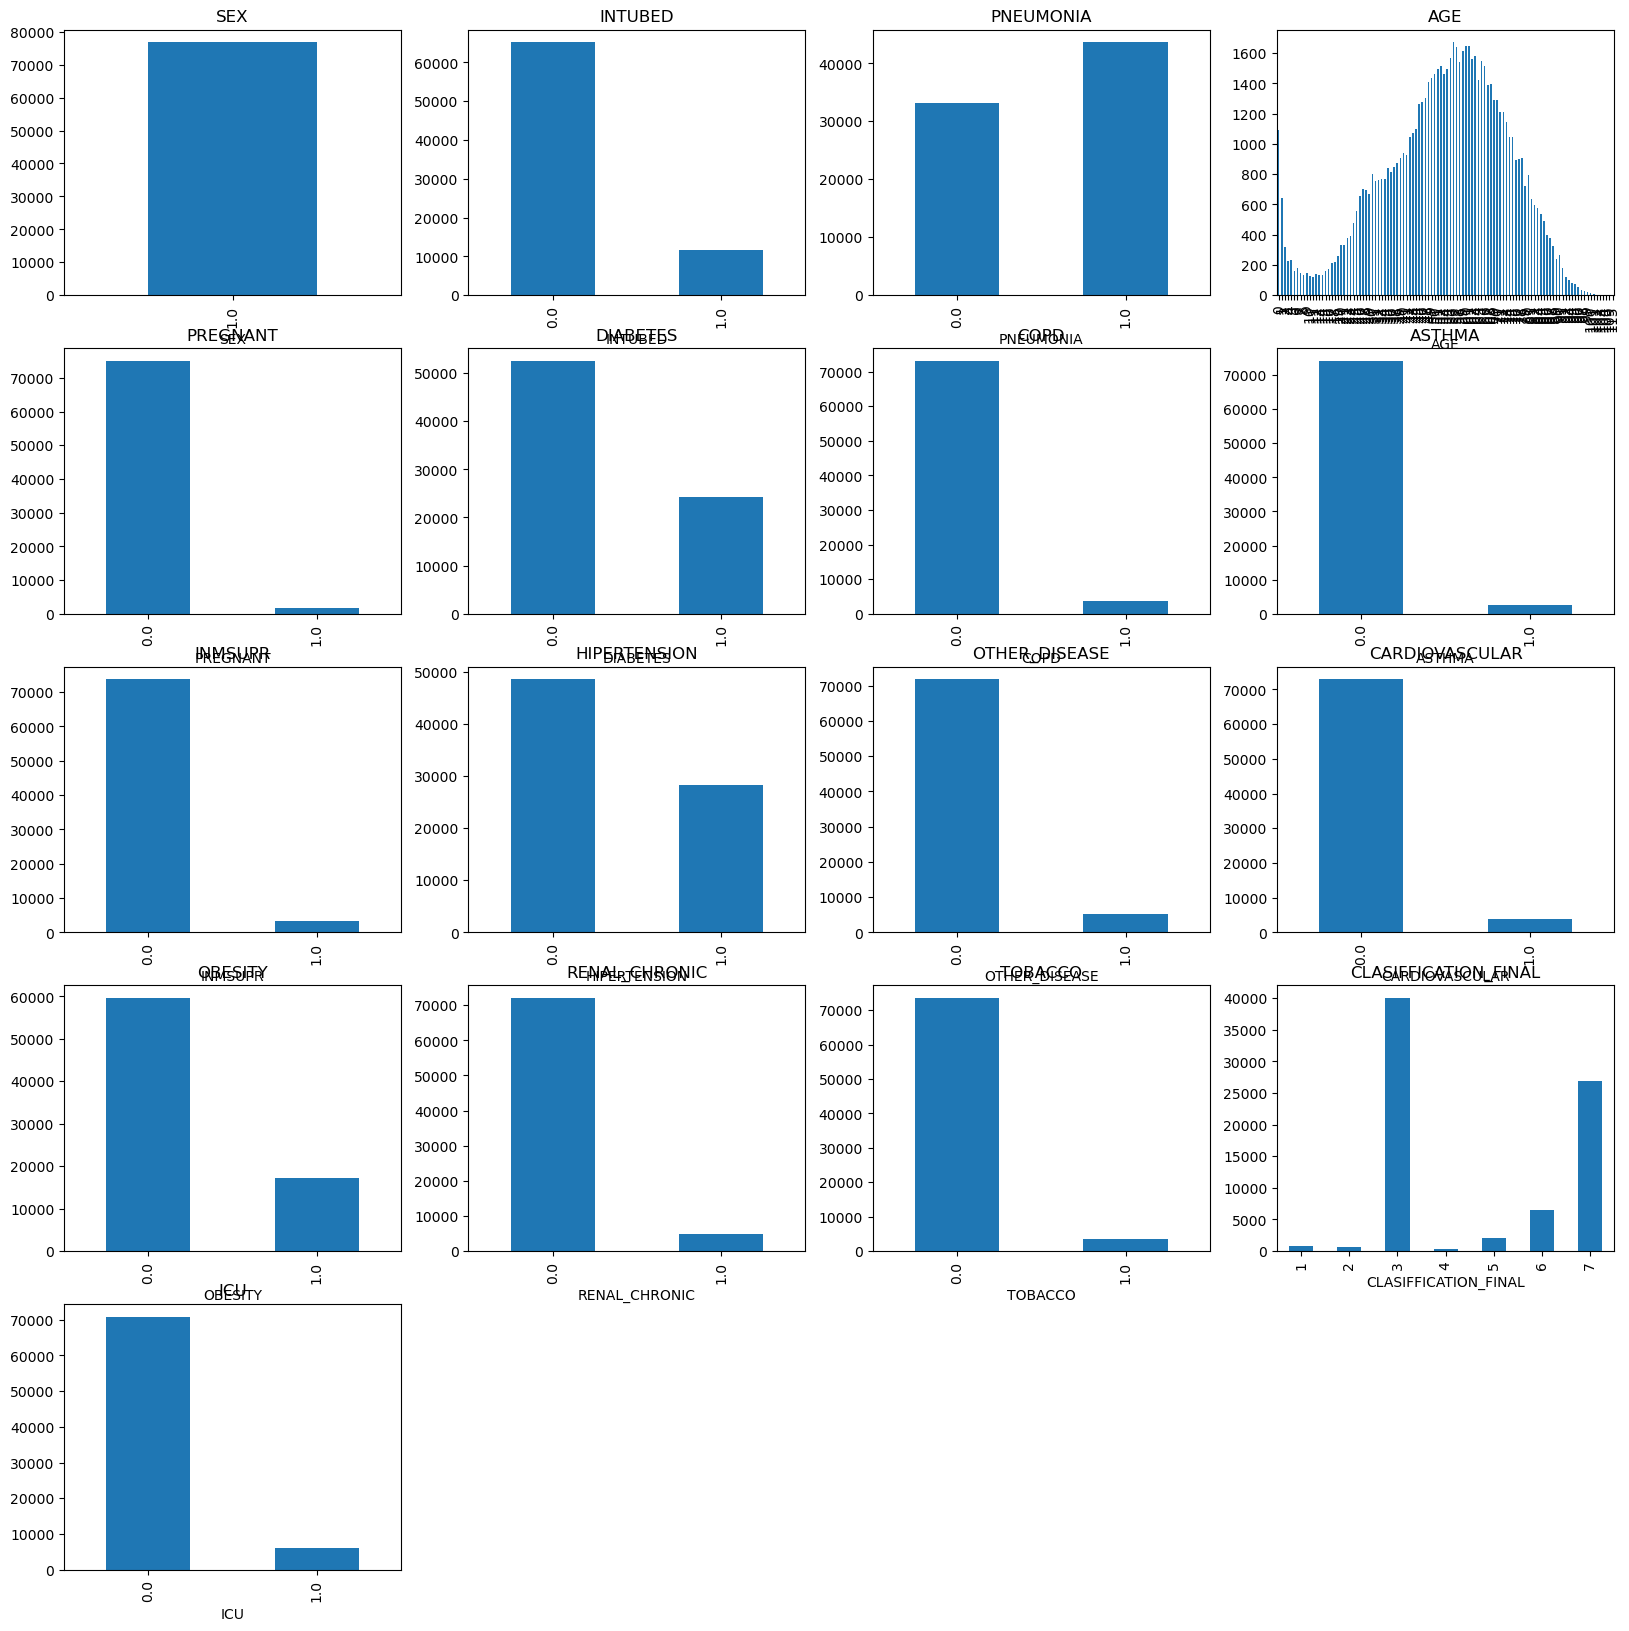

In [18]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=analytics_df2, columns=new_column_list, figsize=(16, 16))

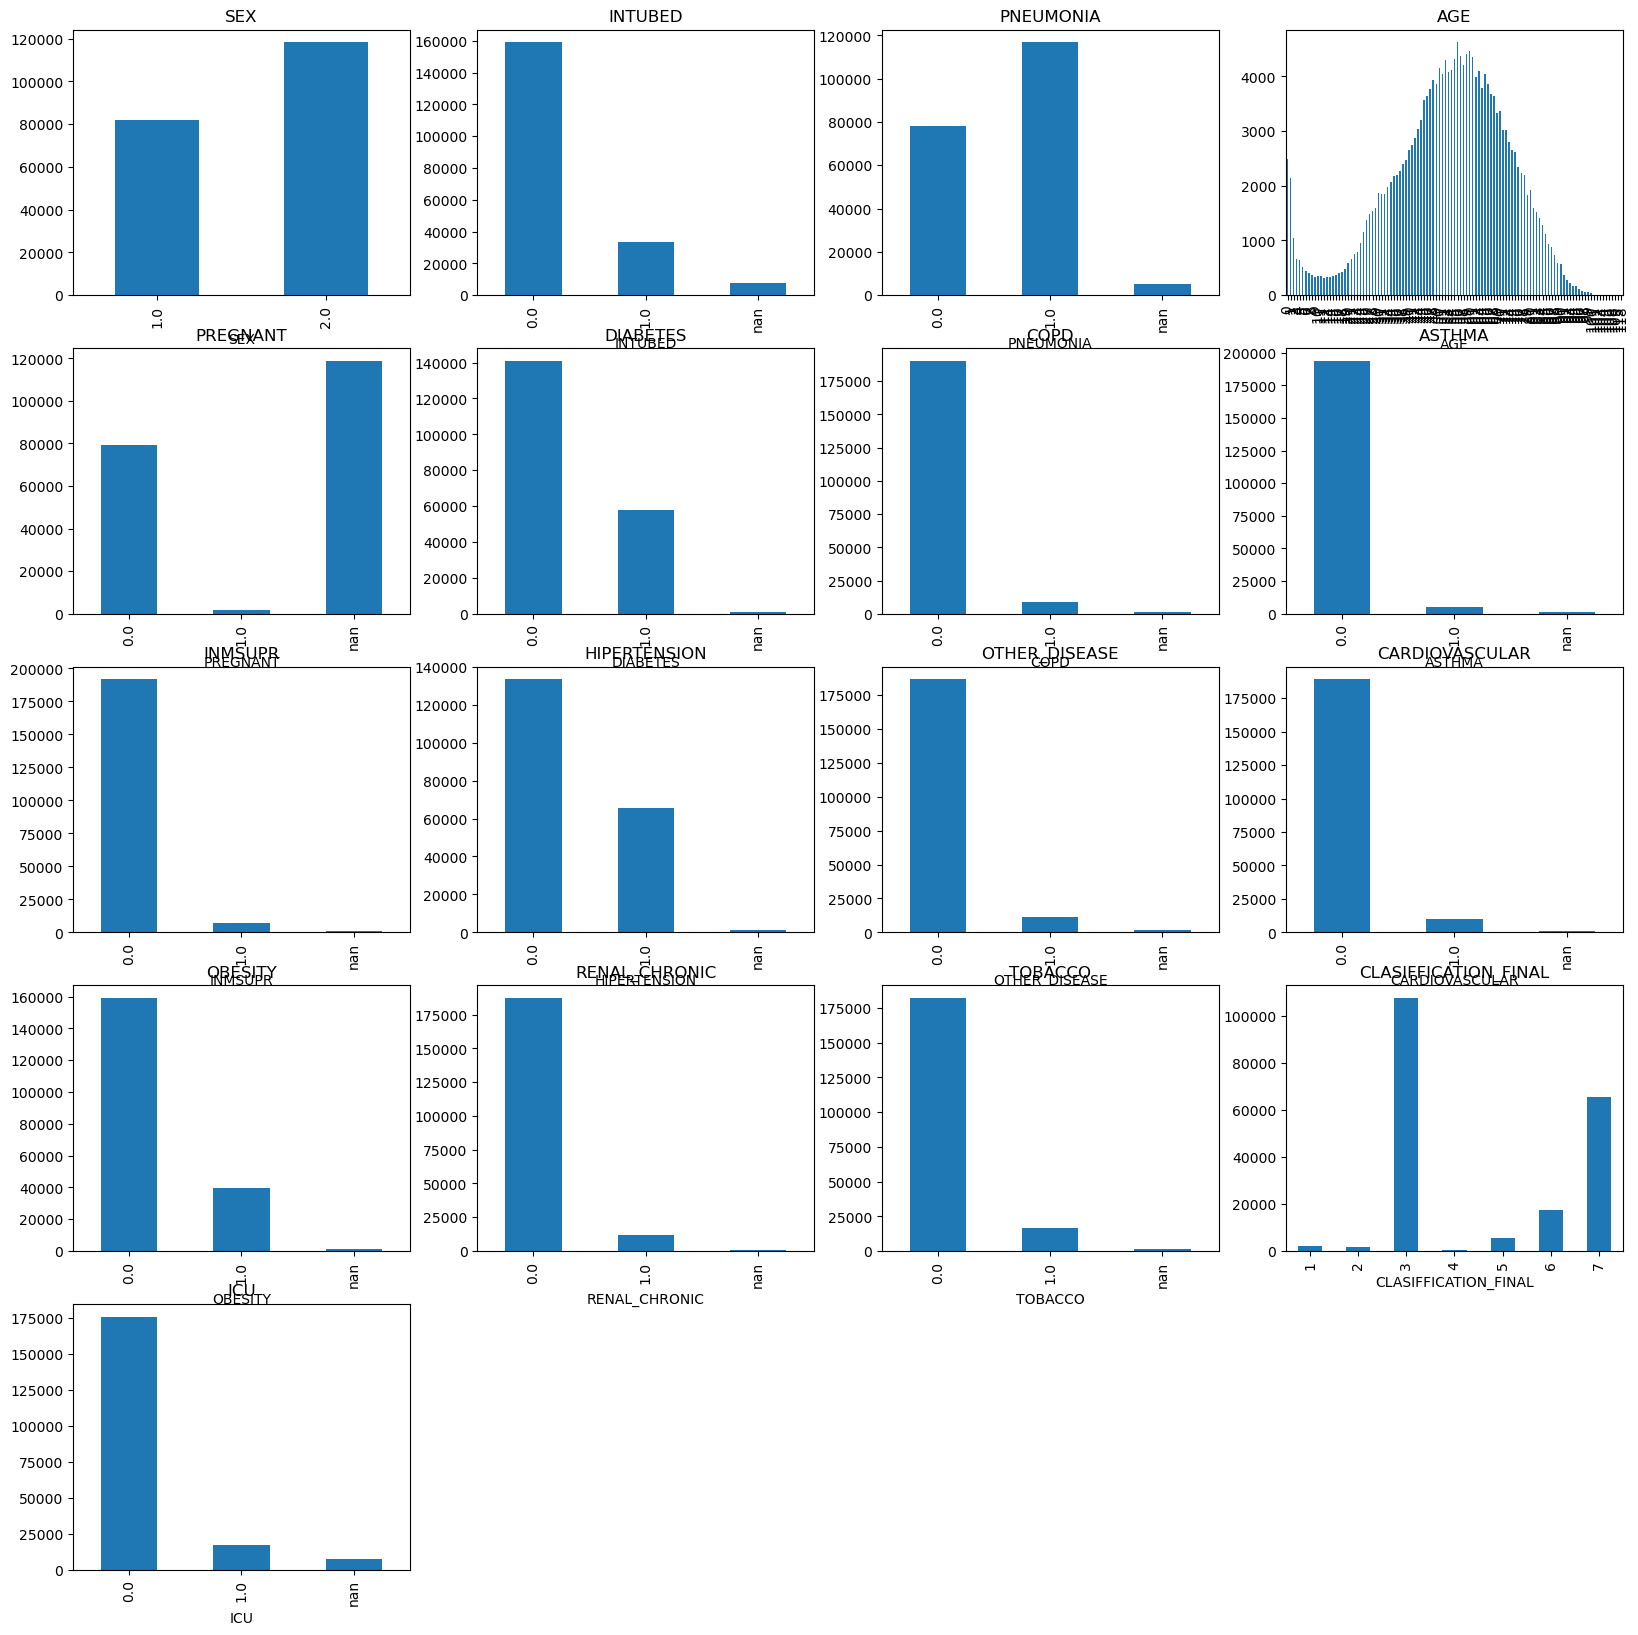

In [22]:
import modules.analytics_helper as ah

ah.plot_multiple_metrics(df=df, columns=new_column_list, figsize=(20, 20))

<Axes: title={'center': 'AGE'}, xlabel='AGE'>

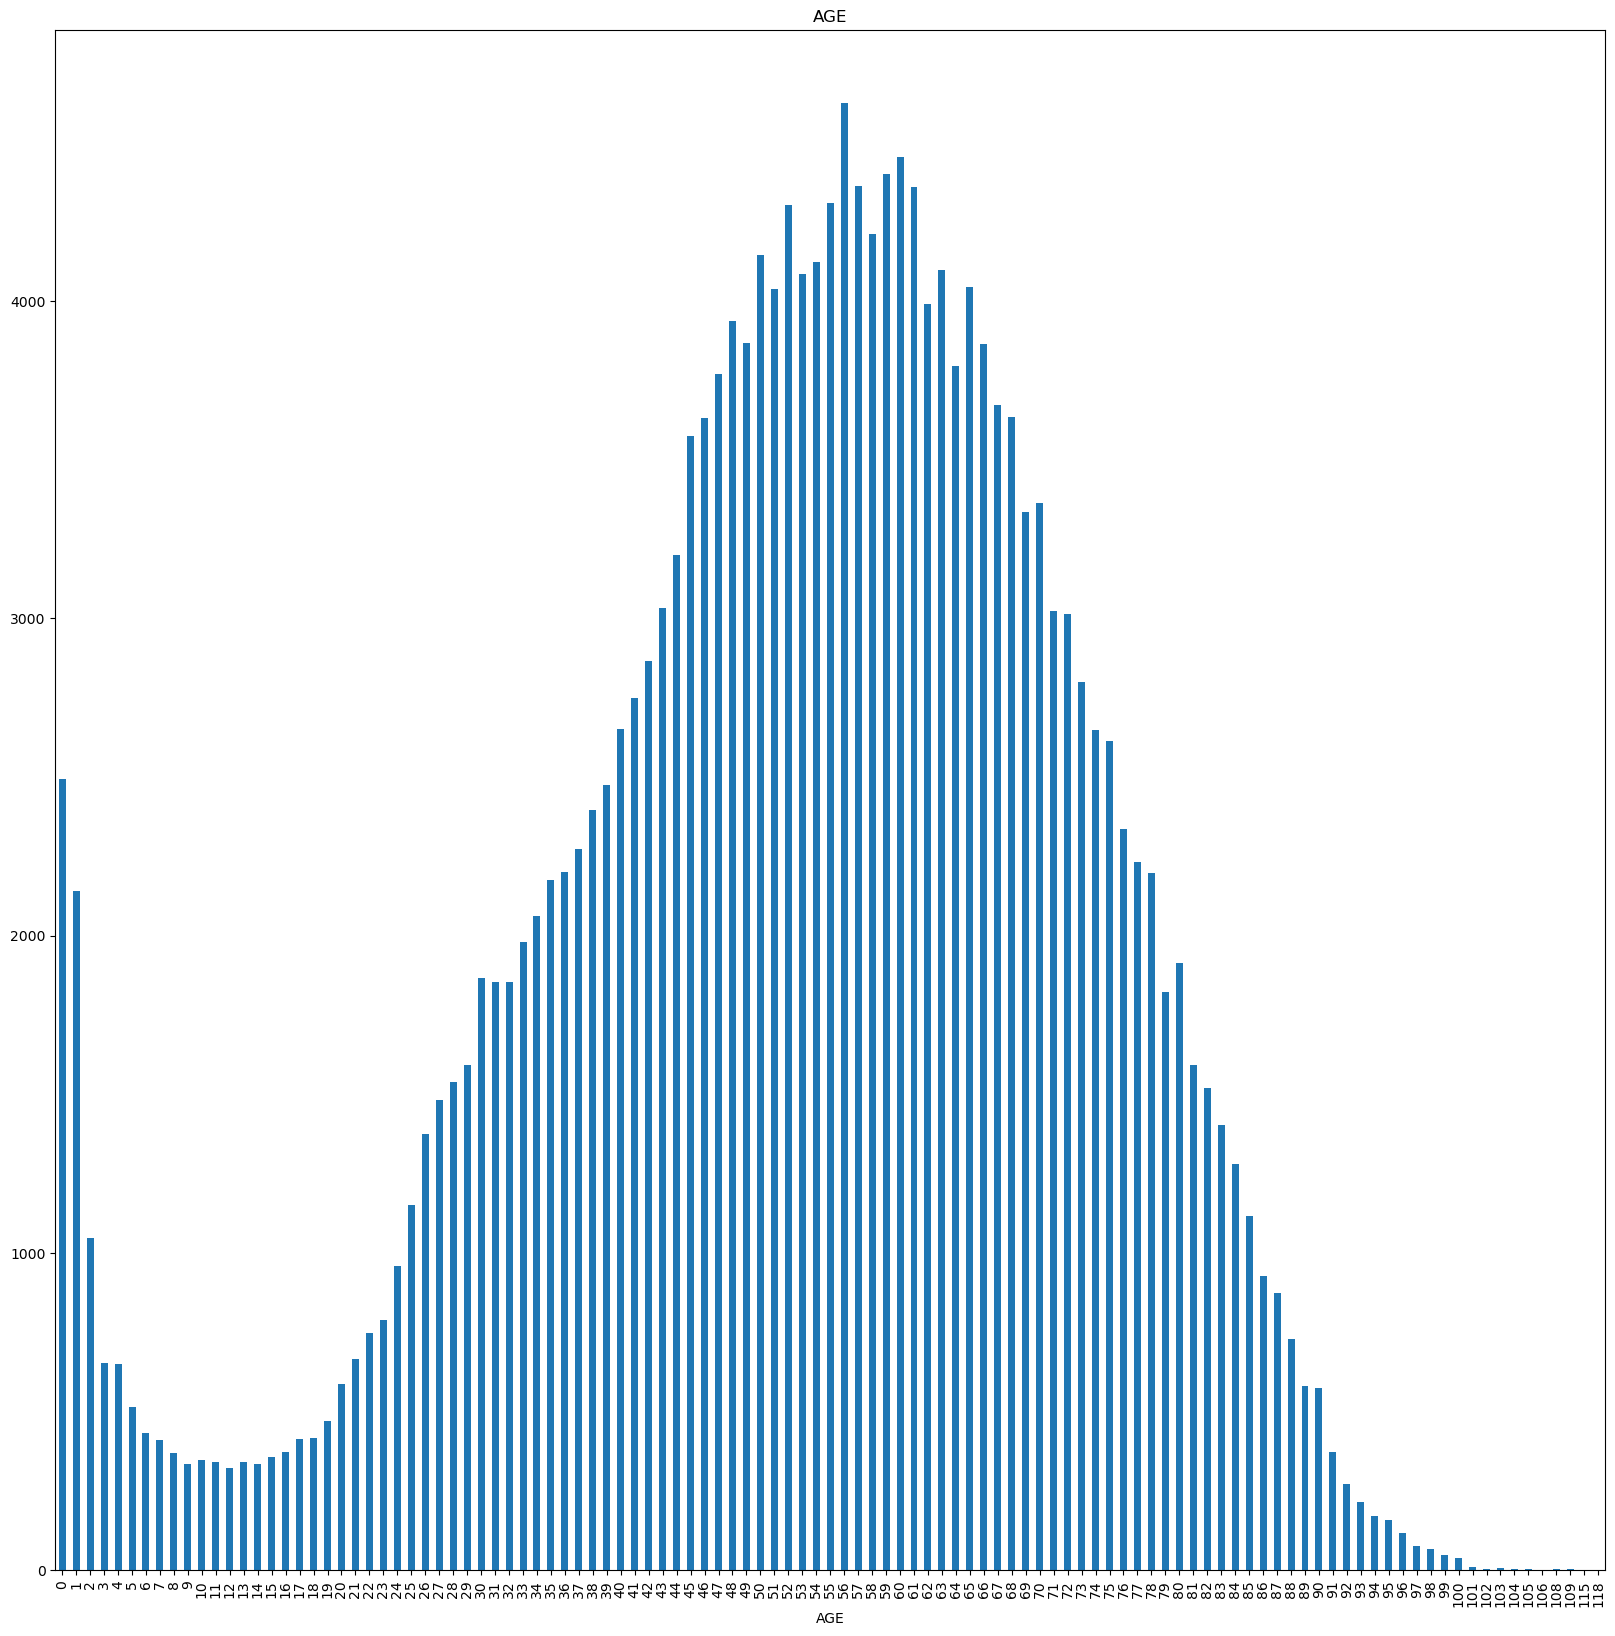

In [20]:
fig = plt.figure(figsize=(20,20)) 
df['AGE'].value_counts().sort_index().plot(kind='bar', title='AGE')